# Uncovering Healthcare Inefficiencies - Data Preprocesssing 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

In [2]:
# Check current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\jessh\Documents\MS_Applied_Data_Science\ADS599 Capstone Project\Module 3


In [3]:
# New working directory location
new_directory = "C:/Users/jessh/Documents/MS_Applied_Data_Science/ADS599 Capstone Project/Project"
os.chdir(new_directory)

# Verify the change
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\jessh\Documents\MS_Applied_Data_Science\ADS599 Capstone Project\Project


In [4]:
# Read in data - might take a while because there 1m+ rows
data = pd.read_csv('cms_data.csv')
print(data.shape)

C:\Users\jessh\AppData\Local\Temp\ipykernel_12400\2526822452.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cms_data.csv')


(1044711, 48)


When reading in the data, Python gave a warning that column 12 (index 13) has mixed data types. Let's take a look.

In [5]:
data.head()

,reference_period,type_of_service,aggregation_level,state,county,state_fips,county_fips,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,...,number_of_fee_for_service_beneficiaries_change,number_of_providers_change,average_number_of_users_per_provider_change,percentage_of_users_out_of_ffs_beneficiaries_change,number_of_users_change,average_number_of_providers_per_county_change,number_of_dual_eligible_users_change,percentage_of_dual_eligible_users_out_of_total_users_change,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change,total_payment_change
0,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,,"36,122,263","8,814",495.69,...,5.81%,0.34%,1.28%,( 3.97%),1.62%,1.19%,( 4.89%),( 6.43%),( 1.20%),1.80%
1,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,,"547,486",146,501.47,...,3.53%,( 2.01%),0.86%,( 4.57%),( 1.17%),1.82%,(11.81%),(10.78%),( 1.35%),( 2.76%)
2,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,,"91,480",33,254.97,...,38.93%,3.13%,19.77%,(11.11%),23.52%,0.15%,0.67%,(18.50%),0.27%,21.32%
3,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,,"740,278",170,401.34,...,8.98%,( 3.41%),6.63%,( 5.44%),3.00%,( 5.90%),( 1.55%),( 4.38%),( 6.60%),7.07%
4,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,,"437,616",86,628.07,...,3.79%,( 3.37%),5.17%,( 2.14%),1.62%,( 7.84%),,,,3.64%


In [6]:
print(data.iloc[:, 12].unique())

[39.85 12.3 6.61 ... '17.64' '107.22' '25.91']


After using the unique command, it shows that there are strings and floats in the column. To fix that, we're going to change all the cells in that column to numeric.

A user defined function is created to check for commas, percent signs, parenthesis, and whitespace. If the cell within a column has that, then it removes it.

In [7]:
# Function to remove ',', '%', '()', and whitespace characters from values
def remove_special_characters(value):
    if isinstance(value, str):
        value = value.replace('%', '')
        value = value.replace('(', '')
        value = value.replace(')', '')
        value = value.replace(',', '')
        value = value.strip()  
    return value

# Determine columns to apply the function on (starting from index 7)
start_index = 7
columns_to_check = data.columns[start_index:]

# Apply remove_special_characters function to each column
for col in columns_to_check:
    data[col] = data[col].apply(remove_special_characters)

In [8]:
# Function to convert string numbers to floats
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return value  # Return as-is if conversion fails

# Apply the function to the column
data['average_number_of_providers_per_county'] = data['average_number_of_providers_per_county'].apply(convert_to_float)

# Verify the data types and values
print("Data types after conversion:")
print(data['average_number_of_providers_per_county'].apply(type).unique())  # Check unique data types

Data types after conversion:
[<class 'float'>]


## Check For Missing Values

In [9]:
# Count how many missing values (NaNs) there are for each column
na_counts = data.isna().sum()
total_records = len(data)
percentage_na = (na_counts / total_records)

# Generate DataFrame from the counts and percentages
na_counts_df = pd.DataFrame({'Missing Count': na_counts, 'Percentage': percentage_na})

# Reset index & rename the index column
na_counts_df.reset_index(inplace=True)
na_counts_df.rename(columns={'index': 'Column'}, inplace=True)

print("DataFrame with counts of NaN values:")
print(tabulate(na_counts_df, headers='keys', tablefmt='fancy_grid'))

DataFrame with counts of NaN values:
╒════╤══════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤══════════════╕
│    │ Column                                                                               │   Missing Count │   Percentage │
╞════╪══════════════════════════════════════════════════════════════════════════════════════╪═════════════════╪══════════════╡
│  0 │ reference_period                                                                     │               0 │    0         │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  1 │ type_of_service                                                                      │               0 │    0         │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  2 │ aggregation_level                                                  

Only rows 30-35 has NaNs, but let's take a closer look to see if that's actually true. We'll rerun this code after all the cleaning has been done.

## Checking unique values for categorical variables

In [10]:
# Function to create a table of unique values for each column with the count
def unique_values_summary(df):
    summary = pd.DataFrame(columns=['Column', 'Unique Values', 'Count'])
    for col in df.columns:
        unique_values = df[col].unique()
        count = len(unique_values)
        unique_values_str = ', '.join(map(str, unique_values[:5]))  # Convert unique values to a string, showing only first 5
        summary = pd.concat([summary, pd.DataFrame({'Column': [col], 'Unique Values': [unique_values_str], 'Count': [count]})], ignore_index=True)
    return summary

# Get unique values summary for the first 7 columns
summary = unique_values_summary(data.iloc[:, :7]) 

# Convert DataFrame to tabular format using tabulate
tabulated_summary = tabulate(summary, headers='keys', tablefmt='fancy_grid')

# Print the tabulated summary
print(tabulated_summary)

╒════╤═══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│    │ Column            │ Unique Values                                                                                                                                  │   Count │
╞════╪═══════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│  0 │ reference_period  │ 2019-01-01 to 2019-12-31, 2019-04-01 to 2020-03-31, 2019-07-01 to 2020-06-30, 2019-10-01 to 2020-09-30, 2020-01-01 to 2020-12-31               │      17 │
├────┼───────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  1 │ type_of_service   │ Ambulance (Emergency & Non-Emergency), Ambulance (Emergency), A

## Convert all String Types into Numeric as Necessary

You'll see in a minute that all the numeric columns have str as their type. We're going to convert all of those into numeric.

In [11]:
# Function to summarize column types
def column_types_summary(df):
    types_summary = []
    for col in df.columns:
        column_type = type(df[col].dropna().iloc[0])
        types_summary.append({'Column': col, 'Type': column_type.__name__})
    return pd.DataFrame(types_summary)

# Get column types summary
types_summary = column_types_summary(data.iloc[:, 7:])

# Convert types summary to tabular format using tabulate
tabulated_summary = tabulate(types_summary, headers='keys', tablefmt='fancy_grid')

# Print the tabulated summary
print(tabulated_summary)

╒════╤══════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│    │ Column                                                                               │ Type    │
╞════╪══════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│  0 │ number_of_fee_for_service_beneficiaries                                              │ str     │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  1 │ number_of_providers                                                                  │ str     │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  2 │ average_number_of_users_per_provider                                                 │ str     │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  3 │ percentage_of_users_out_of_ffs_beneficiaries             

Just checking the first column that is a Str Type, you can see that there are empty spots but it didn't show up in the missing values table above. Let's also check the unique values of the rest of the features.

In [12]:
# Get unique values summary for the rest of the dataframe
summary = unique_values_summary(data.iloc[:, 7:]) 

# Convert DataFrame to tabular format using tabulate
tabulated_summary = tabulate(summary, headers='keys', tablefmt='fancy_grid')

# Print the tabulated summary
print(tabulated_summary)

╒════╤══════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│    │ Column                                                                               │ Unique Values                                                                                                                                                                             │   Count │
╞════╪══════════════════════════════════════════════════════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│  0 │ number_of_fee_for_service_beneficiaries                                              │ 36122263, 547486, 91480, 74027

0                                                        
1           Third Lowest 25 460144 - 821312 Beneficiaries
2                Lowest 25 Less than 167773 Beneficiaries
3           Third Lowest 25 460144 - 821312 Beneficiaries
4          Second Lowest 25 167773 - 460143 Beneficiaries
                                ...                      
1044706         Third Lowest 25 4035 - 9928 Beneficiaries
1044707         Third Lowest 25 4035 - 9928 Beneficiaries
1044708        Second Lowest 25 2010 - 4034 Beneficiaries
1044709            Lowest 25 Less than 2010 Beneficiaries
1044710            Lowest 25 Less than 2010 Beneficiaries
Name: number_of_fee_for_service_beneficiaries_description, Length: 1044711, dtype: object

It looks like columns 7 - 16 and 38-47 doesn't have any "missing values" and are numeric. Let's convert those to numeric. Also doing additional string manipulation for the 'total_payment' column.

In [13]:
data['total_payment'] = data['total_payment'].str.replace('$','').astype(float)

Earlier, we only converted average_number_of_providers_per_county to numeric, so let's try to convert all of them now.

In [58]:
# Function to apply conversion to columns starting from a specific index in a DataFrame
def convert_columns_to_float_from_index(df, start_index, end_index):
    # Ensure the end_index is within the bounds of the DataFrame columns
    end_index = min(end_index, len(df.columns) - 1)
    
    for idx in range(start_index, end_index + 1):
        df.iloc[:, idx] = pd.to_numeric(df.iloc[:, idx], errors='coerce')
        df.iloc[:, idx] = df.iloc[:, idx].astype(float)
    return df

# Convert columns starting from specified index to float
data = convert_columns_to_float_from_index(data, 7, 16)
data = convert_columns_to_float_from_index(data, 38, 47)

# numeric columns only
num_feat_names = data.iloc[: , 7:16].columns.append(data.iloc[:, 38:48].columns)
for name in num_feat_names:
    data[name] = data[name].astype(float)


# non-numeric columns only
cat_feat_names = data.iloc[: , :8].columns.append(data.iloc[:, 17:38].columns)


Checking the types for each column again after conversion - should just be float64.

In [54]:
# Get column types summary
types_summary = column_types_summary(data.iloc[:, 7:])

# Convert types summary to tabular format using tabulate
tabulated_summary = tabulate(types_summary, headers='keys', tablefmt='fancy_grid')

# Print the tabulated summary
print(tabulated_summary)

╒════╤══════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│    │ Column                                                                               │ Type    │
╞════╪══════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│  0 │ number_of_fee_for_service_beneficiaries                                              │ float64 │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  1 │ number_of_providers                                                                  │ float64 │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  2 │ average_number_of_users_per_provider                                                 │ float64 │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│  3 │ percentage_of_users_out_of_ffs_beneficiaries             

In [48]:
num_feat_names

Index(['number_of_fee_for_service_beneficiaries', 'number_of_providers',
       'average_number_of_users_per_provider',
       'percentage_of_users_out_of_ffs_beneficiaries', 'number_of_users',
       'average_number_of_providers_per_county',
       'number_of_dual_eligible_users',
       'percentage_of_dual_eligible_users_out_of_total_users',
       'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries',
       'number_of_fee_for_service_beneficiaries_change',
       'number_of_providers_change',
       'average_number_of_users_per_provider_change',
       'percentage_of_users_out_of_ffs_beneficiaries_change',
       'number_of_users_change',
       'average_number_of_providers_per_county_change',
       'number_of_dual_eligible_users_change',
       'percentage_of_dual_eligible_users_out_of_total_users_change',
       'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_change',
       'total_payment_change'],
      dtype='object')

In [55]:
# Check the data types of the converted columns
converted_columns = data.iloc[:, 7:].dtypes

# Check summary information of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044711 entries, 0 to 1044710
Data columns (total 48 columns):
 #   Column                                                                                Non-Null Count    Dtype  
---  ------                                                                                --------------    -----  
 0   reference_period                                                                      1044711 non-null  object 
 1   type_of_service                                                                       1044711 non-null  object 
 2   aggregation_level                                                                     1044711 non-null  object 
 3   state                                                                                 1044711 non-null  object 
 4   county                                                                                1044711 non-null  object 
 5   state_fips                                                     

In [59]:
# Count how many missing values (NaNs) there are for each column
na_counts = data.isna().sum()
total_records = len(data)
percentage_na = (na_counts / total_records) * 100  # Percentage calculation

# Generate DataFrame from the counts and percentages
na_counts_df = pd.DataFrame({'Missing Count': na_counts, 'Percentage': percentage_na})

# Reset index & rename the index column
na_counts_df.reset_index(inplace=True)
na_counts_df.rename(columns={'index': 'Column'}, inplace=True)

# Print the original DataFrame with counts of NaN values
print("DataFrame with counts of NaN values:")
print(tabulate(na_counts_df, headers='keys', tablefmt='fancy_grid'))

# Filter columns with more than 50% missing data
threshold = 50
columns_above_threshold = na_counts_df[na_counts_df['Percentage'] > threshold]

# Print columns with more than 50% missing data
print("\nColumns with more than 50% missing data:")
print(tabulate(columns_above_threshold, headers='keys', tablefmt='fancy_grid'))

DataFrame with counts of NaN values:
╒════╤══════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤══════════════╕
│    │ Column                                                                               │   Missing Count │   Percentage │
╞════╪══════════════════════════════════════════════════════════════════════════════════════╪═════════════════╪══════════════╡
│  0 │ reference_period                                                                     │               0 │      0       │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  1 │ type_of_service                                                                      │               0 │      0       │
├────┼──────────────────────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  2 │ aggregation_level                                                  

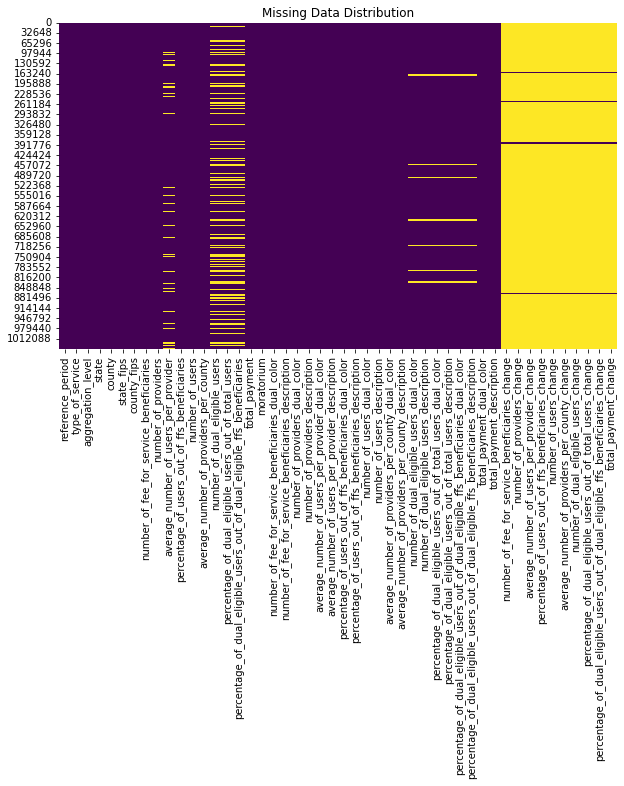

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Distribution')
plt.show()

In [29]:
test = data.iloc[:,7:9]

In [39]:
test['number_of_fee_for_service_beneficiaries'] = test['number_of_fee_for_service_beneficiaries'].astype(float)

In [40]:
for

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044711 entries, 0 to 1044710
Data columns (total 2 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   number_of_fee_for_service_beneficiaries  1044711 non-null  float64
 1   number_of_providers                      1044711 non-null  object 
dtypes: float64(1), object(1)
memory usage: 15.9+ MB


There are now tons of the "missing values" - it might mean that instead of putting 0 for the input, the user left it blank. We can easily impute these values with 0s.

In [61]:
# fill in missing values with 0's
na_df = data.copy()
na_df.iloc[:, 38:48] = na_df.iloc[:,38:48].fillna(0)

In [74]:
# exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_data = data[numeric_columns]

# kurtosis of variables before imputting
numeric_data.kurtosis()

number_of_fee_for_service_beneficiaries                                             2745.319181
number_of_providers                                                                23792.802195
average_number_of_users_per_provider                                                 287.086006
percentage_of_users_out_of_ffs_beneficiaries                                           1.837552
number_of_users                                                                    13090.892832
average_number_of_providers_per_county                                               566.870967
number_of_dual_eligible_users                                                       8858.256024
percentage_of_dual_eligible_users_out_of_total_users                                   0.976728
percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries               1.243945
total_payment                                                                      25831.008965
number_of_fee_for_service_beneficiaries_

In [64]:
# exclude non-numeric columns
na_numeric_columns = na_df.select_dtypes(include=['float', 'int']).columns.tolist()
na_numeric_data = na_df[numeric_columns]

# kurtosis of variables after imputting
na_numeric_data.kurtosis()

number_of_fee_for_service_beneficiaries                                              2745.319181
number_of_providers                                                                 23792.802195
average_number_of_users_per_provider                                                  287.086006
percentage_of_users_out_of_ffs_beneficiaries                                            1.837552
number_of_users                                                                     13090.892832
average_number_of_providers_per_county                                                566.870967
number_of_dual_eligible_users                                                        8858.256024
percentage_of_dual_eligible_users_out_of_total_users                                    0.976728
percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries                1.243945
total_payment                                                                       25831.008965
number_of_fee_for_service_bene

In [ ]:
# numeric columns only
num_features1 = data.iloc[: , 7:16]
num_features2 = data.iloc[:, 38:48]
num_features = pd.concat([num_features1, num_features2], axis=1)
num_features = num_features.apply(pd.to_numeric, errors='coerce')

# non-numeric columns only
cat_features1 = data.iloc[: , :7]
cat_features2 = data.iloc[:, 17:38]
cat_features = pd.concat([cat_features1, cat_features2], axis=1)

## Relationships between features
### Numeric Features

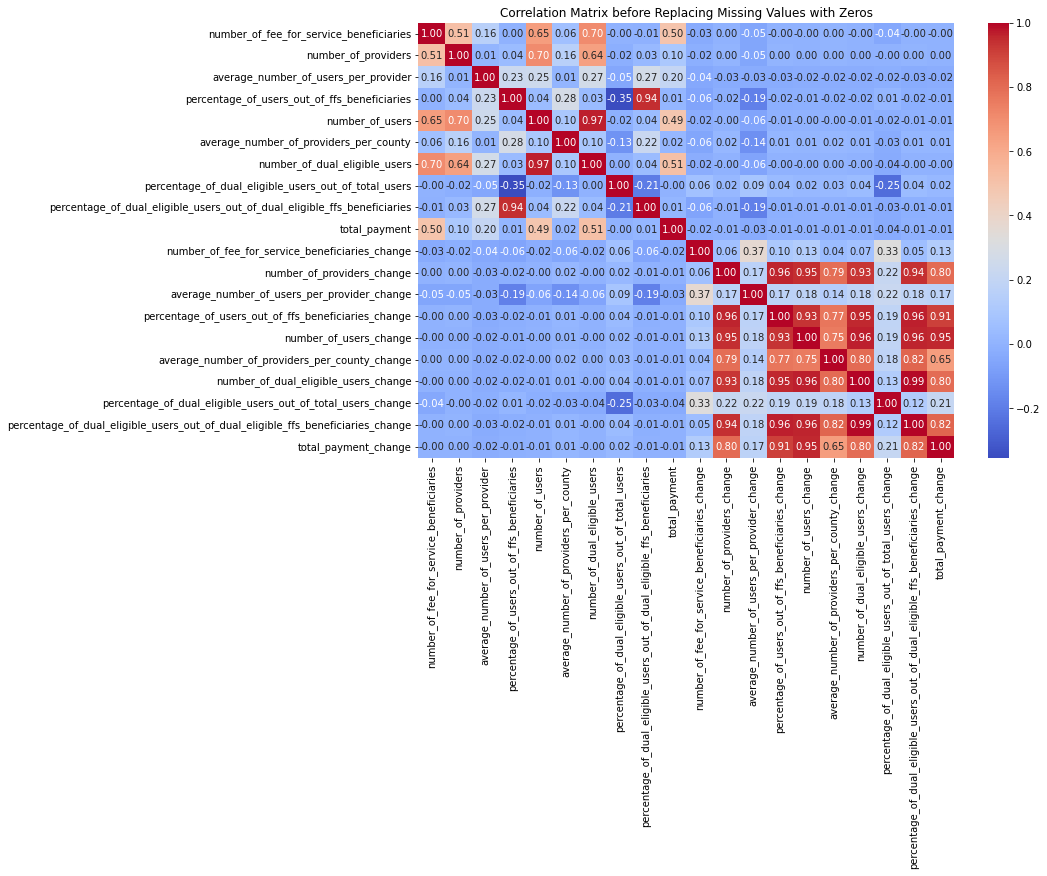

In [65]:
# perform correlation analysiss on numeric values 
correlation_matrix = numeric_data.corr()

# visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix before Replacing Missing Values with Zeros')
plt.show()

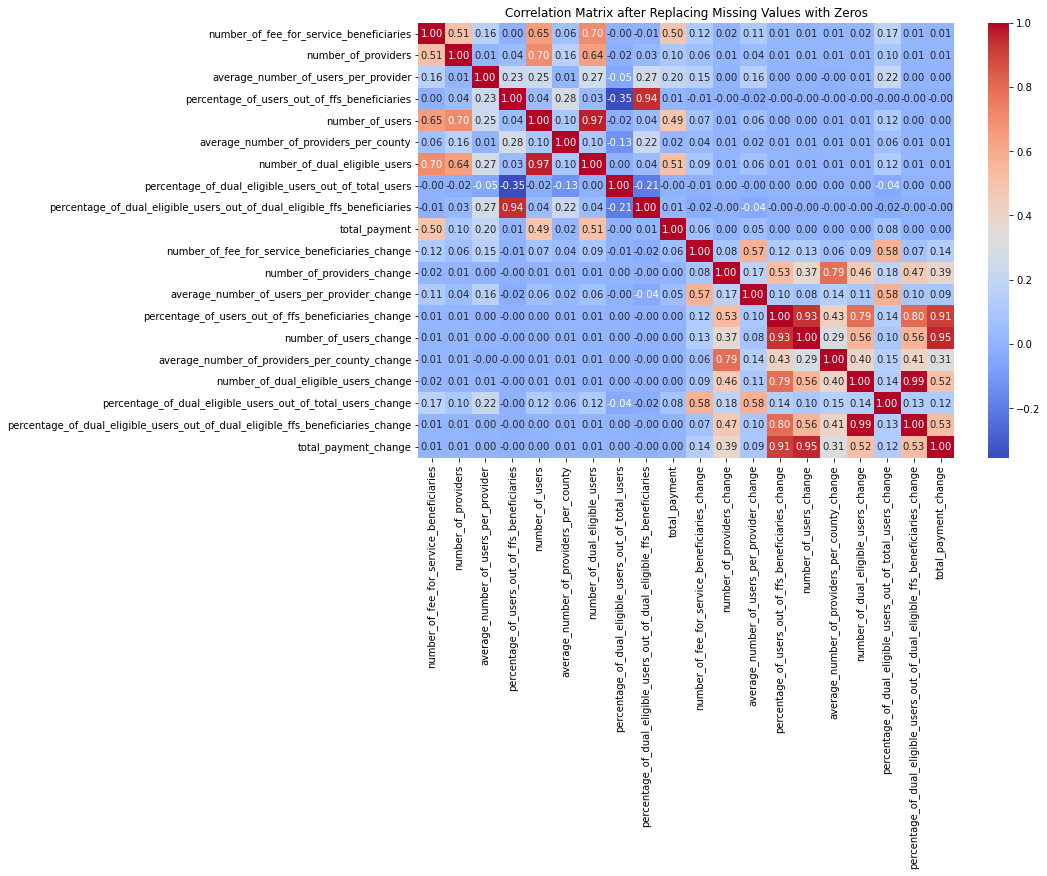

In [66]:
# perform correlation analysiss on numeric values (after imputation)
correlation_matrix = na_numeric_data.corr()

# visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix after Replacing Missing Values with Zeros')
plt.show()

In [75]:
# Drop columns that have over 50% missing values
numeric_data = numeric_data.drop(columns = columns_above_threshold['Column'].values)
numeric_data

,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,number_of_users,average_number_of_providers_per_county,number_of_dual_eligible_users,percentage_of_dual_eligible_users_out_of_total_users,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries,total_payment
0,36122263.0,8814.0,495.69,12.09,4368976.0,39.85,1348463.0,30.86,20.52,4.037494e+09
1,547486.0,146.0,501.47,13.37,73215.0,12.30,24610.0,33.61,21.14,7.464155e+07
2,91480.0,33.0,254.97,9.20,8414.0,6.61,2843.0,33.79,18.44,6.904088e+06
3,740278.0,170.0,401.34,9.22,68228.0,65.52,13267.0,19.45,14.29,4.917614e+07
4,437616.0,86.0,628.07,12.34,54014.0,7.52,NaN,NaN,NaN,4.951514e+07
...,...,...,...,...,...,...,...,...,...,...
1044706,7236.0,2.0,129.00,3.57,258.0,2.00,42.0,16.28,10.17,3.665618e+04
1044707,4139.0,0.0,NaN,2.63,109.0,0.00,NaN,NaN,NaN,2.053767e+04
1044708,3413.0,2.0,65.00,3.81,130.0,2.00,13.0,10.00,10.32,2.197904e+04
1044709,1979.0,0.0,NaN,1.77,35.0,0.00,NaN,NaN,NaN,1.172325e+04


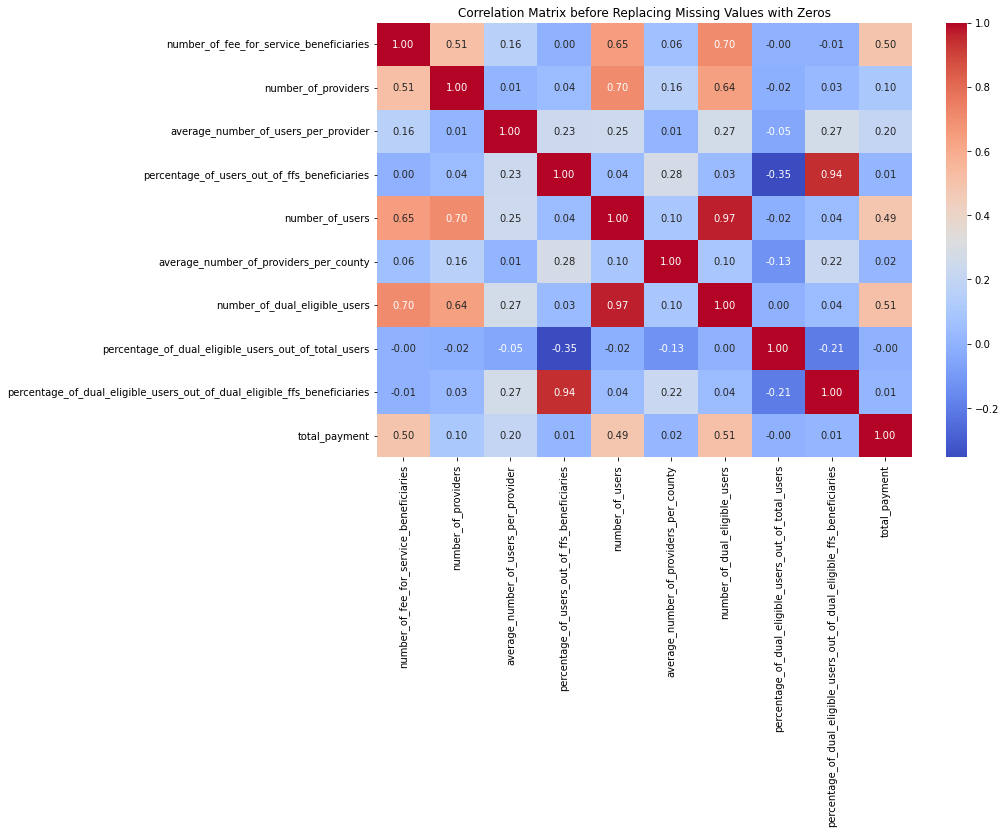

In [76]:
# perform correlation analysiss on numeric values 
correlation_matrix = numeric_data.corr()

# visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix before Replacing Missing Values with Zeros')
plt.show()

In [78]:
# Drop columns that have over 50% missing values
numeric_data = numeric_data.drop(columns = ['percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries',
                                            'number_of_dual_eligible_users'])
numeric_data

,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,number_of_users,average_number_of_providers_per_county,percentage_of_dual_eligible_users_out_of_total_users,total_payment
0,36122263.0,8814.0,495.69,12.09,4368976.0,39.85,30.86,4.037494e+09
1,547486.0,146.0,501.47,13.37,73215.0,12.30,33.61,7.464155e+07
2,91480.0,33.0,254.97,9.20,8414.0,6.61,33.79,6.904088e+06
3,740278.0,170.0,401.34,9.22,68228.0,65.52,19.45,4.917614e+07
4,437616.0,86.0,628.07,12.34,54014.0,7.52,NaN,4.951514e+07
...,...,...,...,...,...,...,...,...
1044706,7236.0,2.0,129.00,3.57,258.0,2.00,16.28,3.665618e+04
1044707,4139.0,0.0,NaN,2.63,109.0,0.00,NaN,2.053767e+04
1044708,3413.0,2.0,65.00,3.81,130.0,2.00,10.00,2.197904e+04
1044709,1979.0,0.0,NaN,1.77,35.0,0.00,NaN,1.172325e+04


In [69]:
columns_above_threshold['Column']

38       number_of_fee_for_service_beneficiaries_change
39                           number_of_providers_change
40          average_number_of_users_per_provider_change
41    percentage_of_users_out_of_ffs_beneficiaries_c...
42                               number_of_users_change
43        average_number_of_providers_per_county_change
44                 number_of_dual_eligible_users_change
45    percentage_of_dual_eligible_users_out_of_total...
46    percentage_of_dual_eligible_users_out_of_dual_...
47                                 total_payment_change
Name: Column, dtype: object

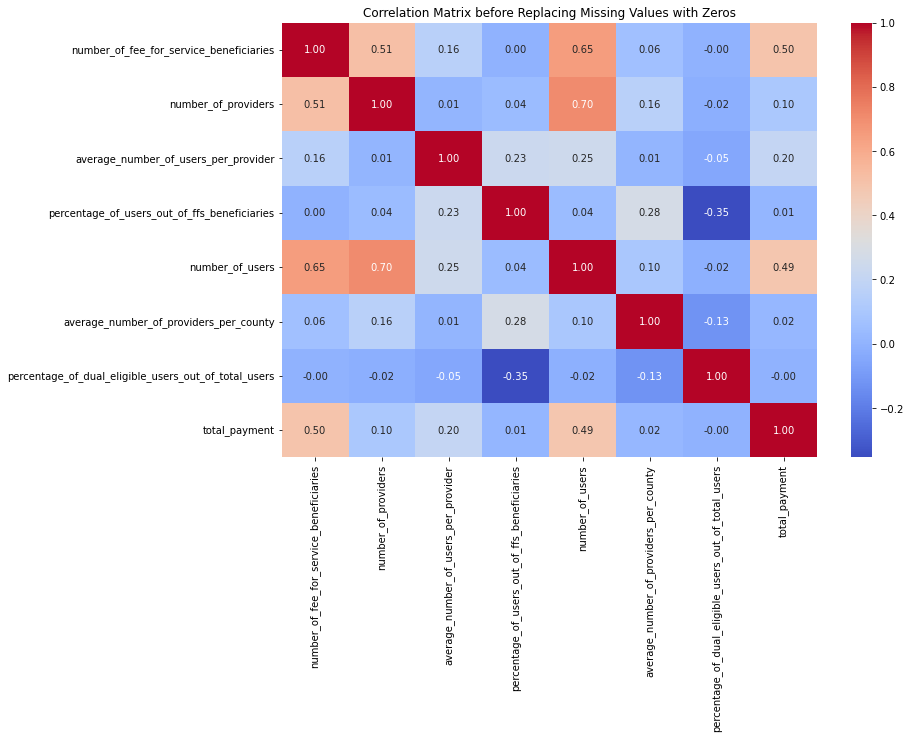

In [79]:
# perform correlation analysiss on numeric values 
correlation_matrix = numeric_data.corr()

# visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix before Replacing Missing Values with Zeros')
plt.show()

In [95]:
# Count how many missing values (NaNs) there are for each column
na_counts = numeric_data.isna().sum()
total_records = len(numeric_data)
percentage_na = (na_counts / total_records)

# Generate DataFrame from the counts and percentages
na_counts_df = pd.DataFrame({'Missing Count': na_counts, 'Percentage': percentage_na})

# Reset index & rename the index column
na_counts_df.reset_index(inplace=True)
na_counts_df.rename(columns={'index': 'Column'}, inplace=True)

print("DataFrame with counts of NaN values:")
print(tabulate(na_counts_df, headers='keys', tablefmt='fancy_grid'))

DataFrame with counts of NaN values:
╒════╤══════════════════════════════════════════════════════╤═════════════════╤══════════════╕
│    │ Column                                               │   Missing Count │   Percentage │
╞════╪══════════════════════════════════════════════════════╪═════════════════╪══════════════╡
│  0 │ number_of_fee_for_service_beneficiaries              │               0 │      0       │
├────┼──────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  1 │ number_of_providers                                  │               0 │      0       │
├────┼──────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  2 │ average_number_of_users_per_provider                 │               0 │      0       │
├────┼──────────────────────────────────────────────────────┼─────────────────┼──────────────┤
│  3 │ percentage_of_users_out_of_ffs_beneficiaries         │               0 │      0       │
├────┼───────

In [93]:
numeric_data = numeric_data.dropna(subset = ['average_number_of_users_per_provider'])

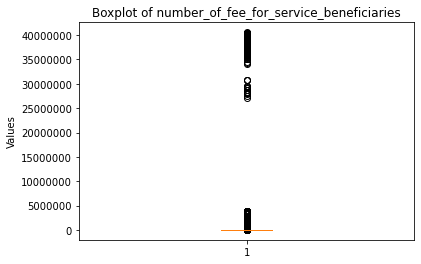

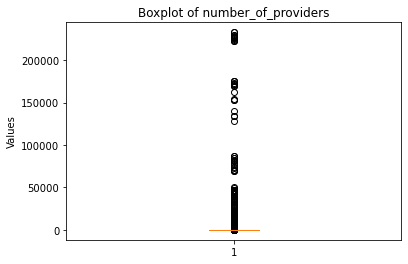

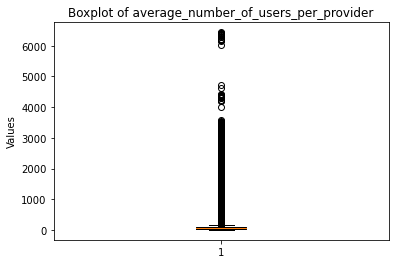

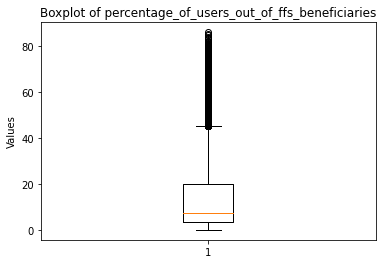

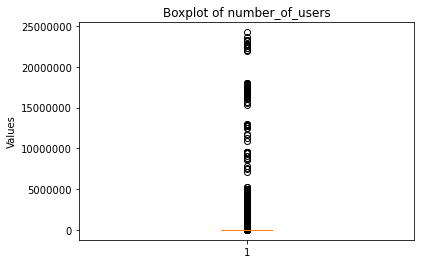

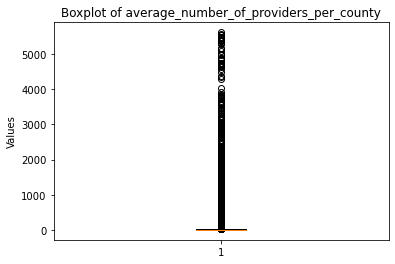

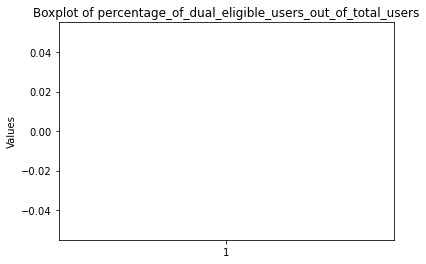

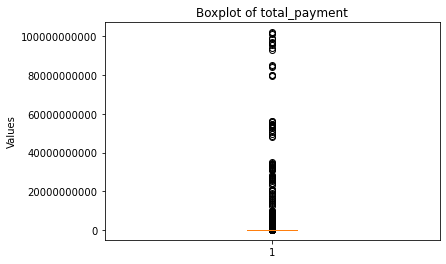

In [94]:
for column in numeric_data.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.boxplot(numeric_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.show()

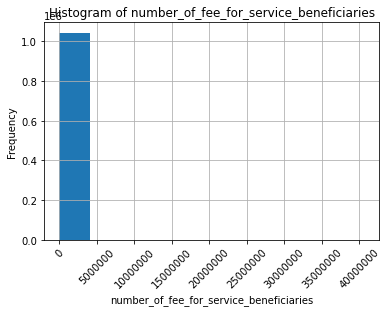

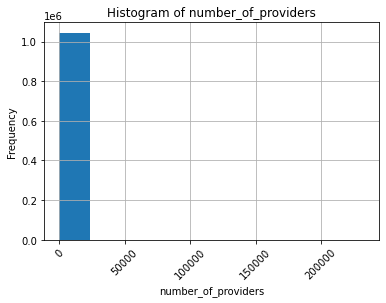

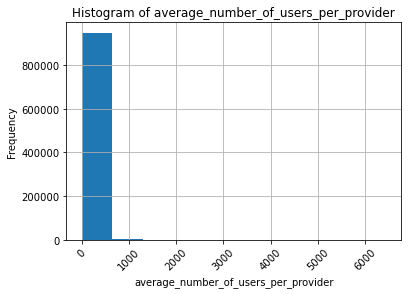

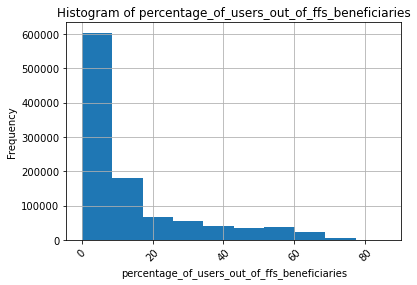

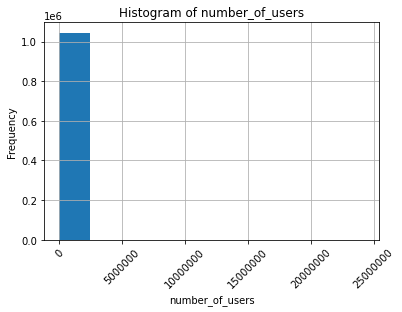

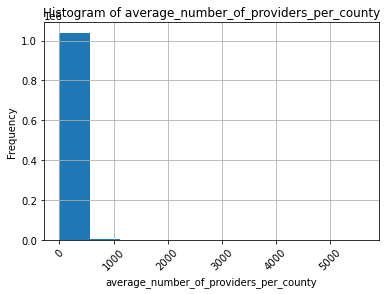

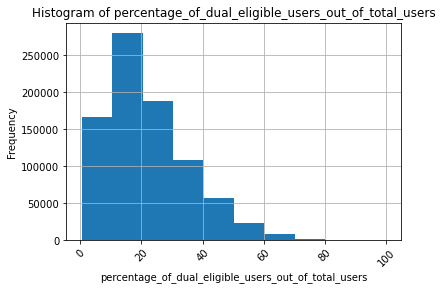

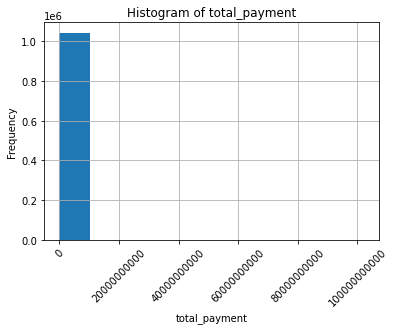

In [91]:
# Plot histograms for each column using Seaborn
# Plot histograms for each column using Matplotlib
for column in numeric_data.columns:
    plt.hist(numeric_data[column], bins=10)  # Adjust bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ticklabel_format(style = 'plain', axis = 'x')
    plt.xticks(rotation=45)
    plt.grid(True)  # Add grid for better visibility
    plt.show()

There are a lot of outliers due to the nature of this data. So, we are keeping all the outliers.

In [98]:
# summary statistics
numeric_data.describe()

,number_of_fee_for_service_beneficiaries,number_of_providers,average_number_of_users_per_provider,percentage_of_users_out_of_ffs_beneficiaries,number_of_users,average_number_of_providers_per_county,percentage_of_dual_eligible_users_out_of_total_users,total_payment
count,9.528550e+05,952855.000000,952855.000000,952855.000000,9.528550e+05,952855.000000,809803.000000,9.528550e+05
mean,4.231288e+04,50.342120,85.920726,14.844010,5.915335e+03,26.286312,21.764811,1.412338e+07
std,7.501500e+05,1291.802371,121.629445,17.121074,1.625877e+05,98.806378,13.268039,5.044303e+08
min,3.300000e+01,1.000000,1.500000,0.010000,1.100000e+01,0.200000,0.470000,1.031290e+03
25%,2.477000e+03,3.000000,36.670000,3.340000,1.280000e+02,3.000000,11.650000,1.022529e+05
50%,5.152000e+03,6.000000,53.500000,7.390000,3.880000e+02,6.000000,18.820000,4.399754e+05
75%,1.327000e+04,18.000000,90.860000,20.000000,1.352000e+03,17.000000,29.130000,2.346172e+06
max,4.058377e+07,232773.000000,6440.620000,85.830000,2.422417e+07,5625.000000,95.450000,1.021595e+11


### Categorical Features

In [100]:
# categorical data
cat_data = data.select_dtypes(exclude=['float', 'int'])
cat_data

,reference_period,type_of_service,aggregation_level,state,county,state_fips,county_fips,moratorium,number_of_fee_for_service_beneficiaries_dual_color,number_of_fee_for_service_beneficiaries_description,...,average_number_of_providers_per_county_dual_color,average_number_of_providers_per_county_description,number_of_dual_eligible_users_dual_color,number_of_dual_eligible_users_description,percentage_of_dual_eligible_users_out_of_total_users_dual_color,percentage_of_dual_eligible_users_out_of_total_users_description,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_dual_color,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_description,total_payment_dual_color,total_payment_description
0,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),NATION + TERRITORIES,--ALL--,--ALL--,,,,,,...,,,,,,,,,,
1,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,01,,No,BLUE 3,Third Lowest 25 460144 - 821312 Beneficiaries,...,BLUE 2,Second Lowest 25 7.10 - 15.11 Providers,BLUE 3,Third Lowest 25 14276 - 31537 Dual Eligible Users,BLUE 4,Top 25 Excl. Extreme Values 33.61 - 49.85 of T...,BLUE 3,Third Lowest 25 19.99 - 22.03 of Total FFS Ben...,BLUE 3,Third Lowest 25 $49345636.69 - $106424718.18
2,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,02,,No,BLUE 1,Lowest 25 Less than 167773 Beneficiaries,...,BLUE 1,Lowest 25 Less than 7.10 Providers,BLUE 1,Lowest 25 Less than 4833 Dual Eligible Users,BLUE 4,Top 25 Excl. Extreme Values 33.61 - 49.85 of T...,BLUE 2,Second Lowest 25 17.37 - 19.98 of Total FFS Be...,BLUE 1,Lowest 25 Less than $13090494.20
3,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,04,,No,BLUE 3,Third Lowest 25 460144 - 821312 Beneficiaries,...,BLUE 4,Top 25 Excl. Extreme Values 37.53 - 83.16 Prov...,BLUE 2,Second Lowest 25 4833 - 14275 Dual Eligible Users,BLUE 1,Lowest 25 Less than 22.78 of Total Users,BLUE 1,Lowest 25 Less than 17.37 of Total FFS Benefic...,BLUE 2,Second Lowest 25 $13090494.20 - $49345636.68
4,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,05,,No,BLUE 2,Second Lowest 25 167773 - 460143 Beneficiaries,...,BLUE 2,Second Lowest 25 7.10 - 15.11 Providers,NaN,NaN,NaN,NaN,NaN,NaN,BLUE 3,Third Lowest 25 $49345636.69 - $106424718.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044706,2023-01-01 to 2023-12-31,Telemedicine,COUNTY,WY,SWEETWATER,56,037,No,BLUE 3,Third Lowest 25 4035 - 9928 Beneficiaries,...,BLUE 3,Third Lowest 25 1.00 - 4.99 Providers,BLUE 3,Third Lowest 25 40 - 92 Dual Eligible Users,BLUE 1,Lowest 25 Less than 18.82 of Total Users,BLUE 4,Top 25 Excl. Extreme Values 8.87 - 15.39 of To...,BLUE 3,Third Lowest 25 $19551.85 - $54071.20
1044707,2023-01-01 to 2023-12-31,Telemedicine,COUNTY,WY,TETON,56,039,No,BLUE 3,Third Lowest 25 4035 - 9928 Beneficiaries,...,BLUE 2,Lowest 50 0.00 - 0.99 Providers,BLUE 1,Lowest 25 Less than 21 Dual Eligible Users,BLUE 1,Lowest 25 Less than 18.82 of Total Users,BLUE 1,Lowest 25 Less than 4.52 of Total FFS Benefici...,BLUE 3,Third Lowest 25 $19551.85 - $54071.20
1044708,2023-01-01 to 2023-12-31,Telemedicine,COUNTY,WY,UINTA,56,041,No,BLUE 2,Second Lowest 25 2010 - 4034 Beneficiaries,...,BLUE 3,Third Lowest 25 1.00 - 4.99 Providers,BLUE 1,Lowest 25 Less than 21 Dual Eligible Users,BLUE 1,Lowest 25 Less than 18.82 of Total Users,BLUE 4,Top 25 Excl. Extreme Values 8.87 - 15.39 of To...,BLUE 3,Third Lowest 25 $19551.85 - $54071.20
1044709,2023-01-01 to 2023-12-31,Telemedicine,COUNTY,WY,WASHAKIE,56,043,No,BLUE 1,Lowest 25 Less than 2010 Beneficiaries,...,BLUE 2,Lowest 50 0.00 - 0.99 Providers,BLUE 1,Lowest 25 Less than 21 Dual Eligible Users,BLUE 1,Lowest 25 Less than 18.82 of Total Users,BLUE 1,Lowest 25 Less than 4.52 of Total FFS Benefici...,BLUE 2,Second Lowest 25 $8198.90 - $19551.84


In [102]:
# Drop columns that provided descriptions of the column - they are redundant
cat_data = cat_data.drop(columns = ['aggregation_level','number_of_fee_for_service_beneficiaries_description',
                                       'number_of_providers_description','average_number_of_users_per_provider_description',
                                       'percentage_of_users_out_of_ffs_beneficiaries_description',
                                       'number_of_users_description',
                                       'average_number_of_providers_per_county_description',
                                       'number_of_dual_eligible_users_description',
                                       'percentage_of_dual_eligible_users_out_of_total_users_description',
                                       'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_description',
                                       'total_payment_description'])
cat_data

,reference_period,type_of_service,state,county,state_fips,county_fips,moratorium,number_of_fee_for_service_beneficiaries_dual_color,number_of_providers_dual_color,average_number_of_users_per_provider_dual_color,percentage_of_users_out_of_ffs_beneficiaries_dual_color,number_of_users_dual_color,average_number_of_providers_per_county_dual_color,number_of_dual_eligible_users_dual_color,percentage_of_dual_eligible_users_out_of_total_users_dual_color,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_dual_color,total_payment_dual_color
0,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),--ALL--,--ALL--,,,,,,,,,,,,,
1,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AL,--ALL--,01,,No,BLUE 3,BLUE 2,BLUE 4,BLUE 4,BLUE 3,BLUE 2,BLUE 3,BLUE 4,BLUE 3,BLUE 3
2,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AK,--ALL--,02,,No,BLUE 1,BLUE 1,BLUE 2,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 4,BLUE 2,BLUE 1
3,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AZ,--ALL--,04,,No,BLUE 3,BLUE 3,BLUE 3,BLUE 2,BLUE 3,BLUE 4,BLUE 2,BLUE 1,BLUE 1,BLUE 2
4,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AR,--ALL--,05,,No,BLUE 2,BLUE 2,BLUE 4,BLUE 3,BLUE 3,BLUE 2,NaN,NaN,NaN,BLUE 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044706,2023-01-01 to 2023-12-31,Telemedicine,WY,SWEETWATER,56,037,No,BLUE 3,BLUE 3,BLUE 4,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 1,BLUE 4,BLUE 3
1044707,2023-01-01 to 2023-12-31,Telemedicine,WY,TETON,56,039,No,BLUE 3,BLUE 2,BLUE 1,BLUE 2,BLUE 3,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 3
1044708,2023-01-01 to 2023-12-31,Telemedicine,WY,UINTA,56,041,No,BLUE 2,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 1,BLUE 1,BLUE 4,BLUE 3
1044709,2023-01-01 to 2023-12-31,Telemedicine,WY,WASHAKIE,56,043,No,BLUE 1,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 2


In [108]:
# Impute mode for all columns
for column in cat_data.columns:
    mode_value = cat_data[column].mode()[0]  # Calculate mode
    cat_data[column].fillna(mode_value)  # Impute mode


In [112]:
# got rid of the first row as it was just an empty row
cat_data.drop(cat_data.index[0], inplace=True)

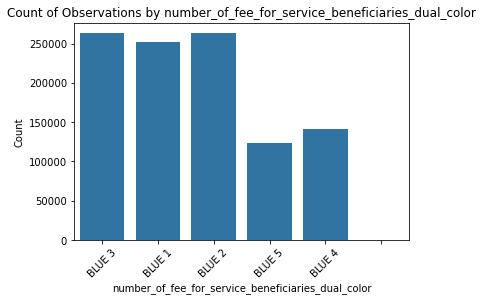

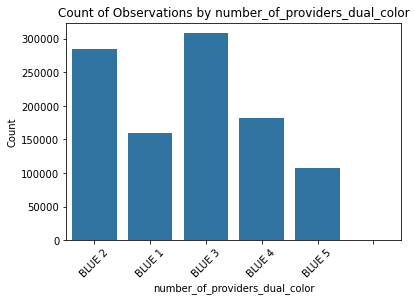

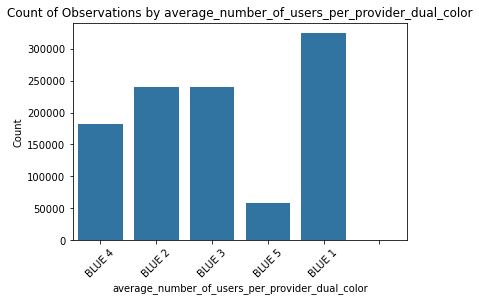

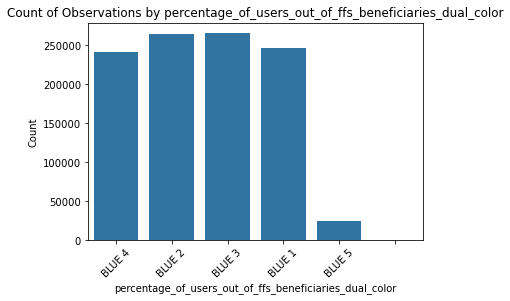

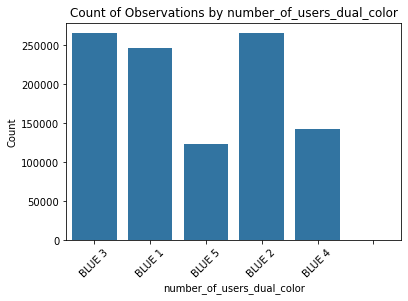

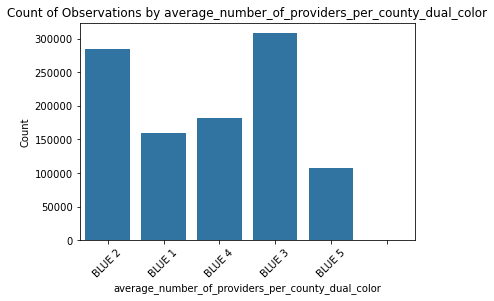

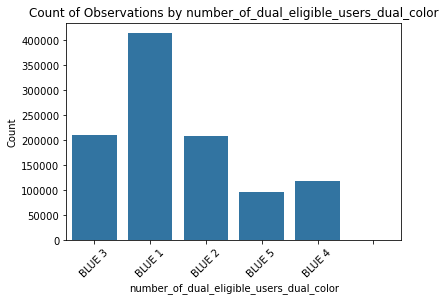

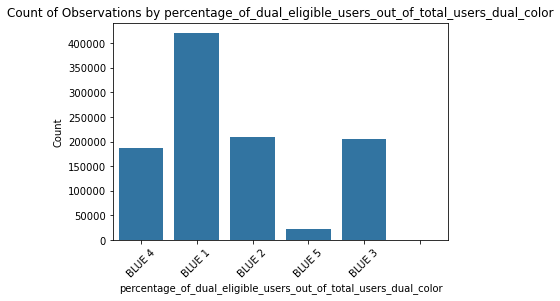

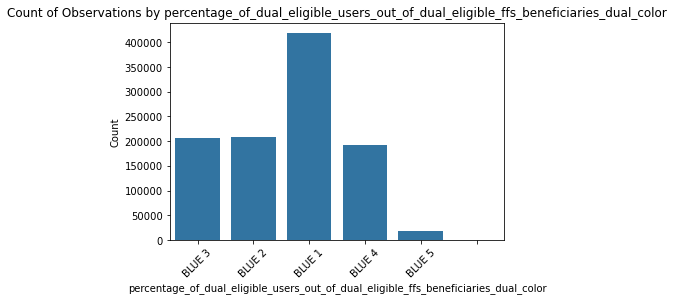

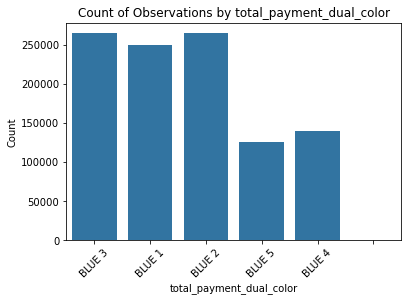

In [114]:
# Plotting count plots for each categorical column
for column in cat_data.iloc[:,7:].columns:
    if cat_data[column].dtype == 'object':  # Check if column is categorical (object dtype)
        plt.figure(figsize=(6, 4))  # Adjust figure size as needed
        sns.countplot(x=column, data=cat_data)
        plt.title(f'Count of Observations by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [113]:
cat_data

,reference_period,type_of_service,state,county,state_fips,county_fips,moratorium,number_of_fee_for_service_beneficiaries_dual_color,number_of_providers_dual_color,average_number_of_users_per_provider_dual_color,percentage_of_users_out_of_ffs_beneficiaries_dual_color,number_of_users_dual_color,average_number_of_providers_per_county_dual_color,number_of_dual_eligible_users_dual_color,percentage_of_dual_eligible_users_out_of_total_users_dual_color,percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries_dual_color,total_payment_dual_color
1,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AL,--ALL--,01,,No,BLUE 3,BLUE 2,BLUE 4,BLUE 4,BLUE 3,BLUE 2,BLUE 3,BLUE 4,BLUE 3,BLUE 3
2,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AK,--ALL--,02,,No,BLUE 1,BLUE 1,BLUE 2,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 4,BLUE 2,BLUE 1
3,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AZ,--ALL--,04,,No,BLUE 3,BLUE 3,BLUE 3,BLUE 2,BLUE 3,BLUE 4,BLUE 2,BLUE 1,BLUE 1,BLUE 2
4,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AR,--ALL--,05,,No,BLUE 2,BLUE 2,BLUE 4,BLUE 3,BLUE 3,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 3
5,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),CA,--ALL--,06,,No,BLUE 5,BLUE 4,BLUE 5,BLUE 2,BLUE 5,BLUE 4,BLUE 5,BLUE 4,BLUE 2,BLUE 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044706,2023-01-01 to 2023-12-31,Telemedicine,WY,SWEETWATER,56,037,No,BLUE 3,BLUE 3,BLUE 4,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 1,BLUE 4,BLUE 3
1044707,2023-01-01 to 2023-12-31,Telemedicine,WY,TETON,56,039,No,BLUE 3,BLUE 2,BLUE 1,BLUE 2,BLUE 3,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 3
1044708,2023-01-01 to 2023-12-31,Telemedicine,WY,UINTA,56,041,No,BLUE 2,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 3,BLUE 1,BLUE 1,BLUE 4,BLUE 3
1044709,2023-01-01 to 2023-12-31,Telemedicine,WY,WASHAKIE,56,043,No,BLUE 1,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 2,BLUE 1,BLUE 1,BLUE 1,BLUE 2


In [116]:
# Remove 'BLUE' from each element in the column

for column in cat_data.iloc[:,7:]:
    cat_data[column] = cat_data[column].str.replace('BLUE', '').str.strip()  #get rid of the word blue and whitespace

In [118]:
cat_data['number_of_fee_for_service_beneficiaries_dual_color']

1          3
2          1
3          3
4          2
5          5
          ..
1044706    3
1044707    3
1044708    2
1044709    1
1044710    1
Name: number_of_fee_for_service_beneficiaries_dual_color, Length: 1044710, dtype: object

In [125]:
# One hot Encode

# Get list of columns to encode
columns_to_encode = cat_data.iloc[:,7:].columns
columns_to_encode = columns_to_encode.to_list()

# Perform one-hot encoding on all columns
df_encoded = pd.get_dummies(cat_data, columns=columns_to_encode, prefix='Encoded')

C:\Users\jessh\AppData\Local\Temp\ipykernel_12400\3689665992.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1          0
2          0
3          0
4          0
5          0
          ..
1044706    0
1044707    0
1044708    0
1044709    0
1044710    0
Name: Encoded_, Length: 1044710, dtype: int32' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_encoded.iloc[:,7:] = df_encoded.iloc[:,7:].astype(int)
C:\Users\jessh\AppData\Local\Temp\ipykernel_12400\3689665992.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1          0
2          1
3          0
4          0
5          0
          ..
1044706    0
1044707    0
1044708    0
1044709    1
1044710    1
Name: Encoded_1, Length: 1044710, dtype: int32' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_encoded.iloc

,reference_period,type_of_service,state,county,state_fips,county_fips,moratorium,Encoded_,Encoded_1,Encoded_2,...,Encoded_2,Encoded_3,Encoded_4,Encoded_5,Encoded_,Encoded_1,Encoded_2,Encoded_3,Encoded_4,Encoded_5
1,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AL,--ALL--,01,,No,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AK,--ALL--,02,,No,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AZ,--ALL--,04,,No,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),AR,--ALL--,05,,No,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,2019-01-01 to 2019-12-31,Ambulance (Emergency & Non-Emergency),CA,--ALL--,06,,No,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044706,2023-01-01 to 2023-12-31,Telemedicine,WY,SWEETWATER,56,037,No,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1044707,2023-01-01 to 2023-12-31,Telemedicine,WY,TETON,56,039,No,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1044708,2023-01-01 to 2023-12-31,Telemedicine,WY,UINTA,56,041,No,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1044709,2023-01-01 to 2023-12-31,Telemedicine,WY,WASHAKIE,56,043,No,0,1,0,...,0,0,0,0,0,0,1,0,0,0
